# Conditional one-dimensional distribution

The coupling spline approach does not work one-dimensional distributions. However, one can use a simple workaround: augment the one-dimensional distribution with an arbitrary independent random dummy variable. A good choice is to draw the second variable from the latent distribution, so that the bijector just has to learn the identity mapping for the augmented variable.

We employ this technique here to learn a conditional distribution. It is a normal distribution whose mean and scale depend on the conditional variable.

In [2]:
import numpy as np
from zenflow import Flow, train
from zenflow.bijectors import rolling_spline_coupling
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

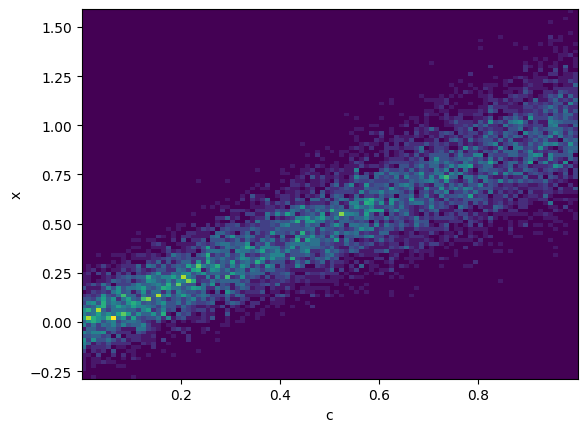

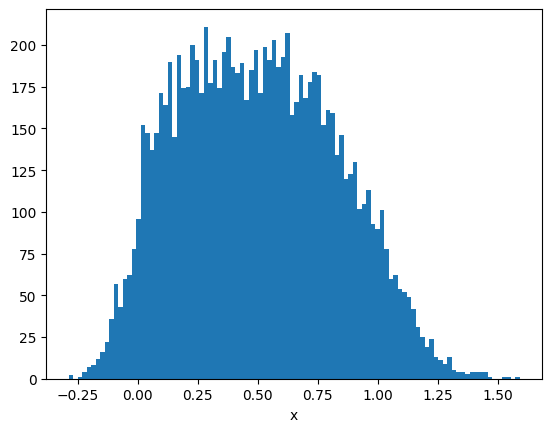

In [3]:
rng = np.random.default_rng(1)

c = rng.uniform(size=10000)
xe = 0.1 + 0.1 * c
x = rng.normal(c, xe)

plt.figure()
plt.hist2d(c, x, bins=100)
plt.xlabel("c")
plt.ylabel("x")
plt.figure()
plt.hist(x, bins=100)
plt.xlabel("x");

In [4]:
flow = Flow(rolling_spline_coupling(2))

u = rng.uniform(size=len(x))
X = np.column_stack((x, u))
X_train, X_test, c_train, c_test = train_test_split(X, c)

In [5]:
variables, best_epoch, loss_train, loss_test = train(flow, X_train, X_test, c_train, c_test)

  0%|          | 0/1000 [00:00<?, ?it/s]

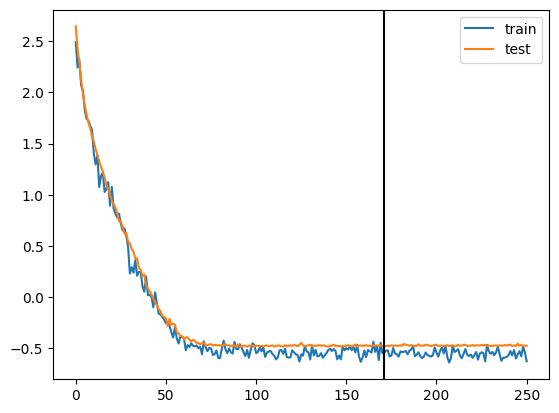

In [6]:
plt.plot(loss_train, label="train")
plt.plot(loss_test, label="test")
plt.axvline(best_epoch, color="k")
plt.legend();

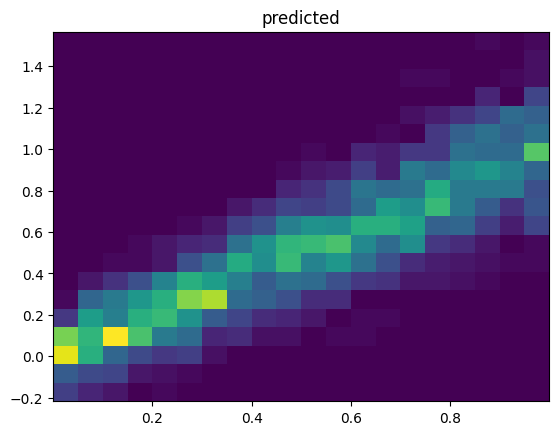

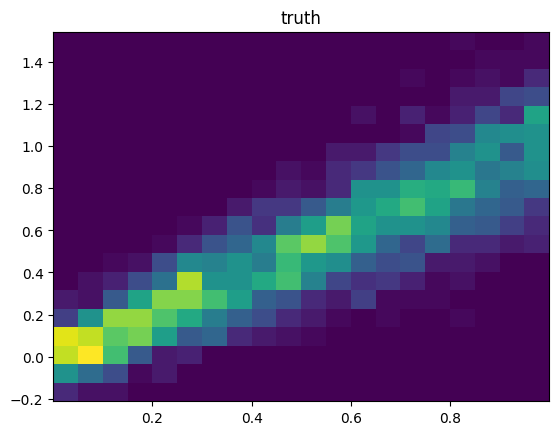

In [7]:
xp = flow.apply(variables, c_test, method="sample")[..., 0]
plt.figure()
plt.title("predicted")
plt.hist2d(c_test, xp, bins=20)
plt.figure()
plt.title("truth")
plt.hist2d(c_test, X_test[..., 0], bins=20);